<img src='backpropogation.png'>

In [1]:
import os
from PIL import Image
import numpy as np
from pathlib import Path
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_path='Data/emotion_classification/train/'
files=os.listdir(data_path)
test_data_path='Data/emotion_classification/test/'

#os.listdir(test_data_path)
#files=os.listdir(data_path)
test_files=os.listdir(test_data_path)
#print(os.listdir(data_path))

N=len(files)
label=np.zeros(N)
j=0
for i in files:
  w=i.split(".")
  if (w[1]=="happy"):
    label[j]=1
  else:
    label[j]=0
  j=j+1
label=np.array(label)

n=len(test_files)
label_test=np.zeros(n)
j=0
for i in test_files:
  w=i.split(".")
  if (w[1]=="happy"):
    label_test[j]=1
  else:
    label_test[j]=0
  j=j+1
label_test=np.array(label_test)

train_imag=[]
test_imag=[]
for i in files:
  ind_path=data_path+'/'+i
  im=Image.open(ind_path)
  im=np.array(im).reshape(-1,)
  train_imag.append(im)

X=train_imag   #data

for i in test_files:
  ind_path=test_data_path+'/'+i
  img=Image.open(ind_path)
  img=np.array(img).reshape(-1,)
  test_imag.append(img)

Y=test_imag   #data


comb_data=np.vstack([X,Y])
#print(np.shape(comb_data))

comb_data=np.array(comb_data)
mean_comb=np.mean(comb_data,axis=0)
comb_new=comb_data-mean_comb



In [4]:
def standardization(X):
    X=np.array(X,dtype='float64')
    X_mean=mean_vector=np.mean(X,axis=0)
    X_standard_var=np.sqrt(np.mean(np.square(X-X_mean),axis=0))
    X_standard=(X-X_mean)/X_standard_var
    return X_standard
#%%
def sigmoid(X):
    z = 1/(1 + np.exp(-X))  
    return z

def sigmoid_derivative(X):
    return np.multiply(sigmoid(X),1-sigmoid(X))


def ReLU(X):
    return np.maximum(X, 0)

def softmax(a):
    prob=np.exp(a)
    coloum_sum=np.sum(prob,axis=1)
    
    
    for i in range(prob.shape[0]):
        prob[i]=prob[i]/coloum_sum[i]
        
    return prob

def reluDerivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    x=np.array(x)
    return x

 
def one_hot_encoding(no_samples,no_classes,labels):
    t=np.zeros((no_samples,no_classes),np.int16)
    
    for i in range(no_train_samples):
        t[i][labels[i]]=1
    
    return t
    
def cross_entropy(true_labels,estimated_labels):
    # true_labels are in one hot encoding.
    # estimated labels are in probability
    
    no_samples=true_labels.shape[0]
    return -np.sum(true_labels*np.log(y_dash))  

In [5]:
#applying high dimensional PCA on data 
K=12
pca = PCA(n_components=K)
#pca_x = pca.fit_transform(X) #testing
#pca_y = pca.fit_transform(Y)  #training

pca_comb=pca.fit_transform(comb_new)
pca_comb=pca_comb-np.mean(pca_comb,axis=0)
pca_train=pca_comb[0:20,:]   #test data 
pca_test=pca_comb[20:,:]     #train data

In [6]:
def back_propgation(h1,h2,a1,a2,a3,y,y_dash):
    no_train_samples=y.shape[0]
    sum_w3_gradients=np.zeros_like(W3)
    sum_w2_gradients=np.zeros_like(W2)
    sum_w1_gradients=np.zeros_like(W1)
    
    for image_index in range(no_train_samples):
    
        y_dash_individual=y_dash[image_index]
        e_calculated_y=np.zeros_like(y_dash_individual)
        e_calculated_y[y[image_index]]=1
                
        delta_a3=-(e_calculated_y-y_dash_individual)
        #print(delta_a3.shape)
        
        # gradients for w3
        delta_w3=np.outer(delta_a3,h2[image_index])
        
        delta_h2=W3@delta_a3
        g_dash_a2=reluDerivative(a2[image_index])
        delta_a2=np.multiply(delta_h2,g_dash_a2)

        # gradients for w2
        delta_w2=np.outer(delta_a2,h1[image_index])

        delta_h1=W2@delta_a2
        g_dash_a1=reluDerivative(a1[image_index])
        delta_a1=np.multiply(delta_h1,g_dash_a1)

        # gradients for w1
        delta_w1=np.outer(delta_a1,X[image_index])
 
        sum_w3_gradients=sum_w3_gradients+delta_w3.T
        sum_w2_gradients=sum_w2_gradients+delta_w2.T
        sum_w1_gradients=sum_w1_gradients+delta_w1.T

    delta_w3= sum_w3_gradients
    delta_w2= sum_w2_gradients
    delta_w1= sum_w1_gradients
    
    return delta_w1,delta_w2,delta_w3

In [7]:
def forward_propgation(X):
    #activation
    #print(W1.shape)
    #print(X.shape)
    
    a1=X@W1
    
    #print("a1.shape",a1.shape)
    #non-linear
    h1=ReLU(a1)
    #print('h1.shape',h1.shape)
    h1=standardization(h1)
    
    a2=h1@W2
    #print("a2.shape",a2.shape)
    #non-linear
    h2=ReLU(a2)
    #print('h2.shape',h2.shape)
    h2=standardization(h2)

    a3=h2@W3
    #print('a2.shape',a3.shape)
    #output layer0
    
    y_dash=softmax(a3)
    
    calulated_labels=np.argmax(y_dash,axis=1)
    
    #print('calulated_labels.shape',calulated_labels.shape)
    
    return a1,h1,a2,h2,a3,y_dash,calulated_labels

In [8]:
def accuracy(true_labels,calculated_labels):
    
    no_correct=0
    no_samples=true_labels.shape[0]
    for i in range(no_samples):
        if(true_labels[i]==calculated_labels[i]):
            no_correct=no_correct+1
    return (no_correct/no_samples)*100

In [9]:
X=pca_train.copy()
X=standardization(X)
y=np.array(label,np.int16)    

no_train_samples=X.shape[0]
no_classes=2
t=one_hot_encoding(no_train_samples,no_classes,y)

In [10]:
#appending ones to make co-efficient for bias 

bias=np.ones((20,1))
X=np.hstack([X,bias])
print(X.shape)


test_X=standardization(pca_test)
bias=np.ones((10,1))
test_X=np.hstack([test_X,bias])
test_X.shape

(20, 13)


(10, 13)

# 10-Layer DNN:

In [11]:
#about neural network.


input_size=12
output_size=2    
hidden_layer_01_size=10
hidden_layer_02_size=10


#adding input layer
W1=np.random.randn(input_size+1,hidden_layer_01_size+1)

#adding hidden layers
W2=np.random.randn(hidden_layer_01_size+1,hidden_layer_02_size+1)

#adding hidden layers.
W3=np.random.randn(hidden_layer_02_size+1,output_size)
    
#adding output softmax_layer need to weight.

In [12]:
loss_E=[]

for i in range(20):

    a1,h1,a2,h2,a3,y_dash,calulated_labels=forward_propgation(X)
    
    E=cross_entropy(t,y_dash)
    loss_E.append(E)
    print('cross_entropy',E)
    
    delta_w1,delta_w2,delta_w3=back_propgation(h1,h2,a1,a2,a3,y,y_dash)
    
    learning_rate=0.01
    
    
    W1=W1-learning_rate*delta_w1
    W2=W2-learning_rate*delta_w2
    W3=W3-learning_rate*delta_w3


cross_entropy 30.105054082927406
cross_entropy 23.648071671808385
cross_entropy 18.76292142396288
cross_entropy 14.62113432567621
cross_entropy 11.984650573360728
cross_entropy 10.0625413943857
cross_entropy 8.723812242463858
cross_entropy 7.820246420828657
cross_entropy 7.114007231091094
cross_entropy 6.564128738999105
cross_entropy 6.114274949331643
cross_entropy 5.713736368600761
cross_entropy 5.374306030054969
cross_entropy 5.068723229189999
cross_entropy 4.8045379449893755
cross_entropy 4.541088078622476
cross_entropy 4.245895903513761
cross_entropy 4.022971061068298
cross_entropy 3.801811539774282
cross_entropy 3.6349998194852464


Text(0.5, 1.0, 'Epochs vs Training error for 10 layer DNN')

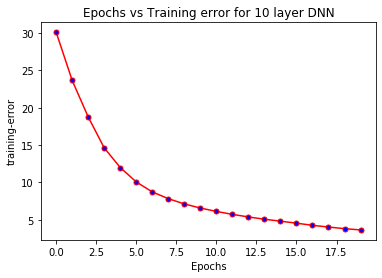

In [13]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(20)),loss_E, color ="red",marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Epochs')
plt.ylabel('training-error')
plt.title('Epochs vs Training error for 10 layer DNN')


Accuracy Testing for 10 layer DNN:

In [14]:
caculated_labels=forward_propgation(X)[6]
print('training_accuracy',accuracy(caculated_labels,y))

training_accuracy 95.0


In [16]:
test_y=np.array(label_test,np.int16) 

caculated_labels=forward_propgation(test_X)[6]
print('training_accuracy',accuracy(caculated_labels,y))

training_accuracy 80.0


# 15-Layer DNN:

In [17]:
#about neural network.


input_size=12
output_size=2    
hidden_layer_01_size=15
hidden_layer_02_size=15


#adding input layer
W1=np.random.randn(input_size+1,hidden_layer_01_size+1)

#adding hidden layers
W2=np.random.randn(hidden_layer_01_size+1,hidden_layer_02_size+1)

#adding hidden layers.
W3=np.random.randn(hidden_layer_02_size+1,output_size)
    
#adding output softmax_layer need to weight.

In [18]:
loss_E=[]

for i in range(20):

    a1,h1,a2,h2,a3,y_dash,calulated_labels=forward_propgation(X)
    
    E=cross_entropy(t,y_dash)
    loss_E.append(E)
    print('cross_entropy',E)
    
    delta_w1,delta_w2,delta_w3=back_propgation(h1,h2,a1,a2,a3,y,y_dash)
    
    learning_rate=0.01
    
    
    W1=W1-learning_rate*delta_w1
    W2=W2-learning_rate*delta_w2
    W3=W3-learning_rate*delta_w3

cross_entropy 39.422504624090216
cross_entropy 14.080993815360118
cross_entropy 6.657606613470238
cross_entropy 5.6227382891359685
cross_entropy 4.977423563269104
cross_entropy 4.427059882873962
cross_entropy 3.9217629611100326
cross_entropy 3.47893744491993
cross_entropy 3.091789299357532
cross_entropy 2.7894905942208377
cross_entropy 2.4363863455866452
cross_entropy 2.135217502812237
cross_entropy 1.882339339709985
cross_entropy 1.6753909416125063
cross_entropy 1.517233082475045
cross_entropy 1.365401703173935
cross_entropy 1.2659638430780582
cross_entropy 1.1523554798535198
cross_entropy 1.0581617784453339
cross_entropy 0.980145751858505


Text(0.5, 1.0, 'Epochs vs Training error for 15 layer DNN')

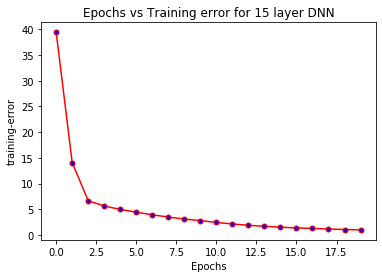

In [19]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(20)),loss_E, color ="red",marker='o', markerfacecolor='blue', markersize=5)
plt.xlabel('Epochs')
plt.ylabel('training-error')
plt.title('Epochs vs Training error for 15 layer DNN')


In [20]:
caculated_labels=forward_propgation(X)[6]
print('training_accuracy',accuracy(caculated_labels,y))

training_accuracy 100.0


In [21]:
test_y=np.array(label_test,np.int16) 
caculated_labels=forward_propgation(test_X)[6]
print('testing_accuracy',accuracy(caculated_labels,y))

testing_accuracy 80.0
